In [1]:
!nvidia-smi

Mon Sep  1 15:54:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
#installing Ultralytics
!pip install Ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!pip install roboflow

## Downloading the **dataset**

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="YrwQJSREGqQDLjoxfiI3")
project = rf.workspace("adalrhman").project("facial-emotion-trpg7")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Emotion-1 in yolov11:: 100%|██████████| 6110/6110 [00:00<00:00, 6856.70it/s]


In [7]:
dataset.location

'/content/Facial-Emotion-1'

## Training the Model

In [8]:
!yolo task=detect mode=train model="yolo11n.pt" data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-Emotion-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

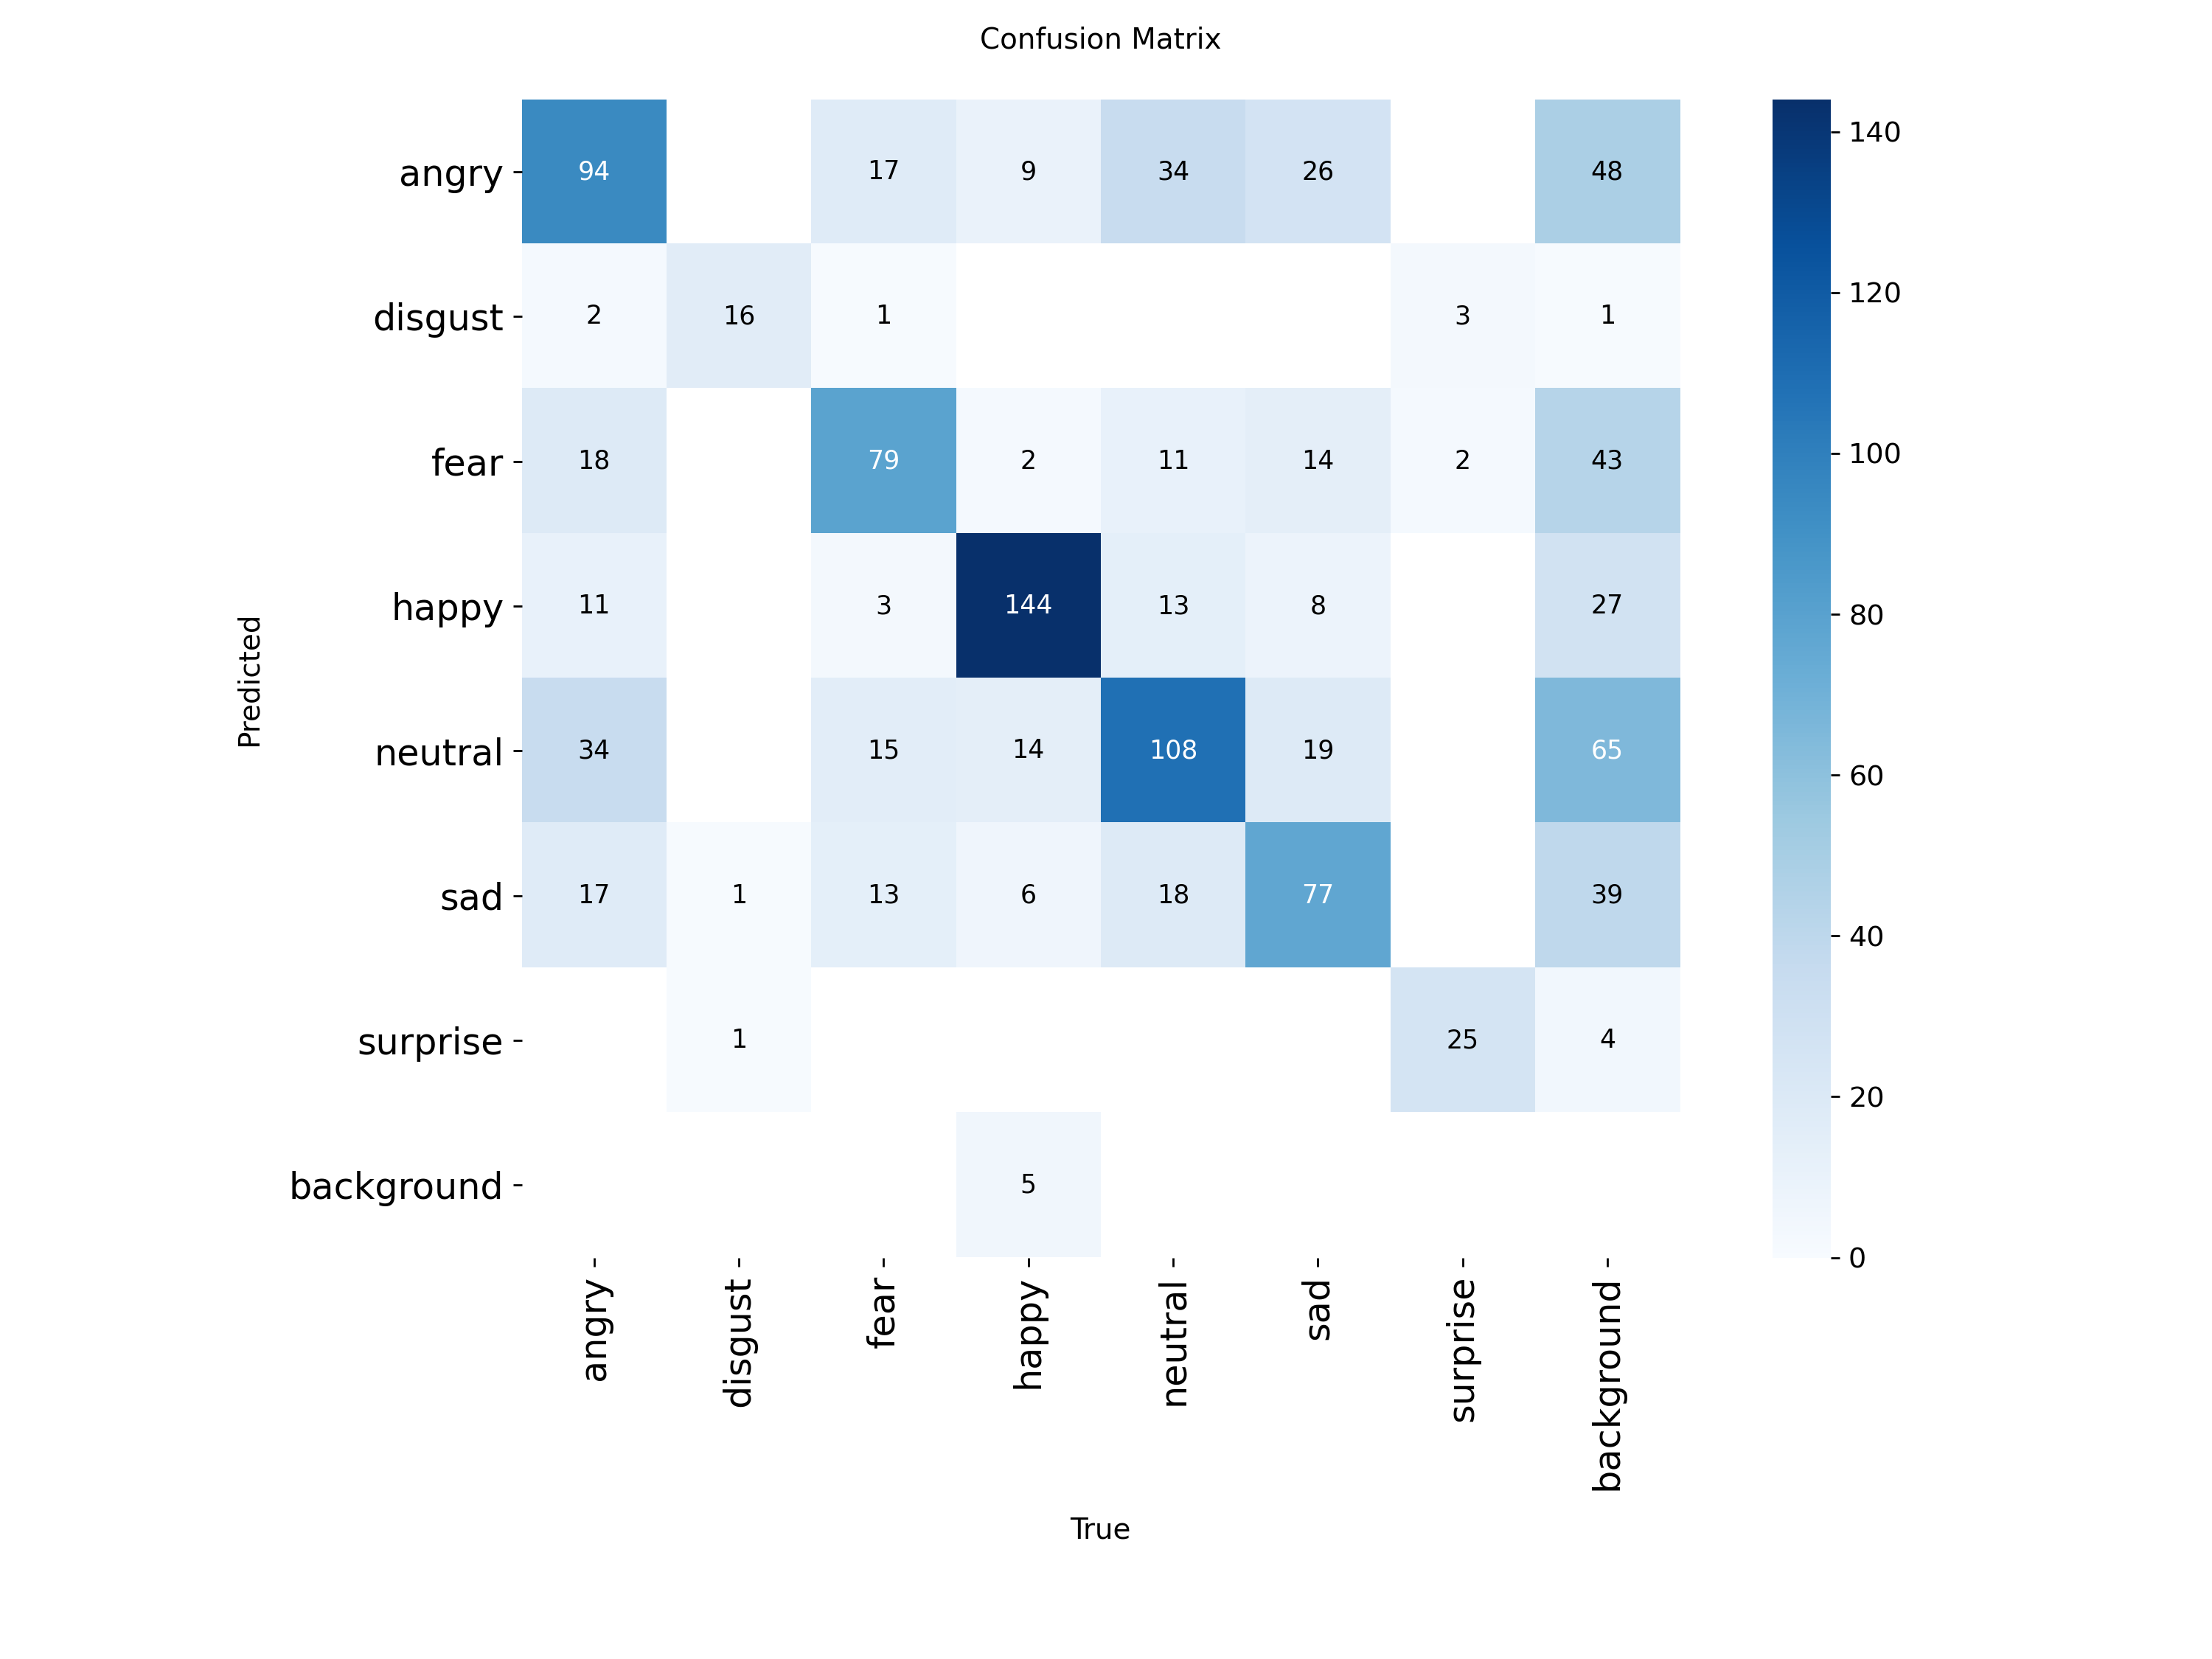

In [9]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

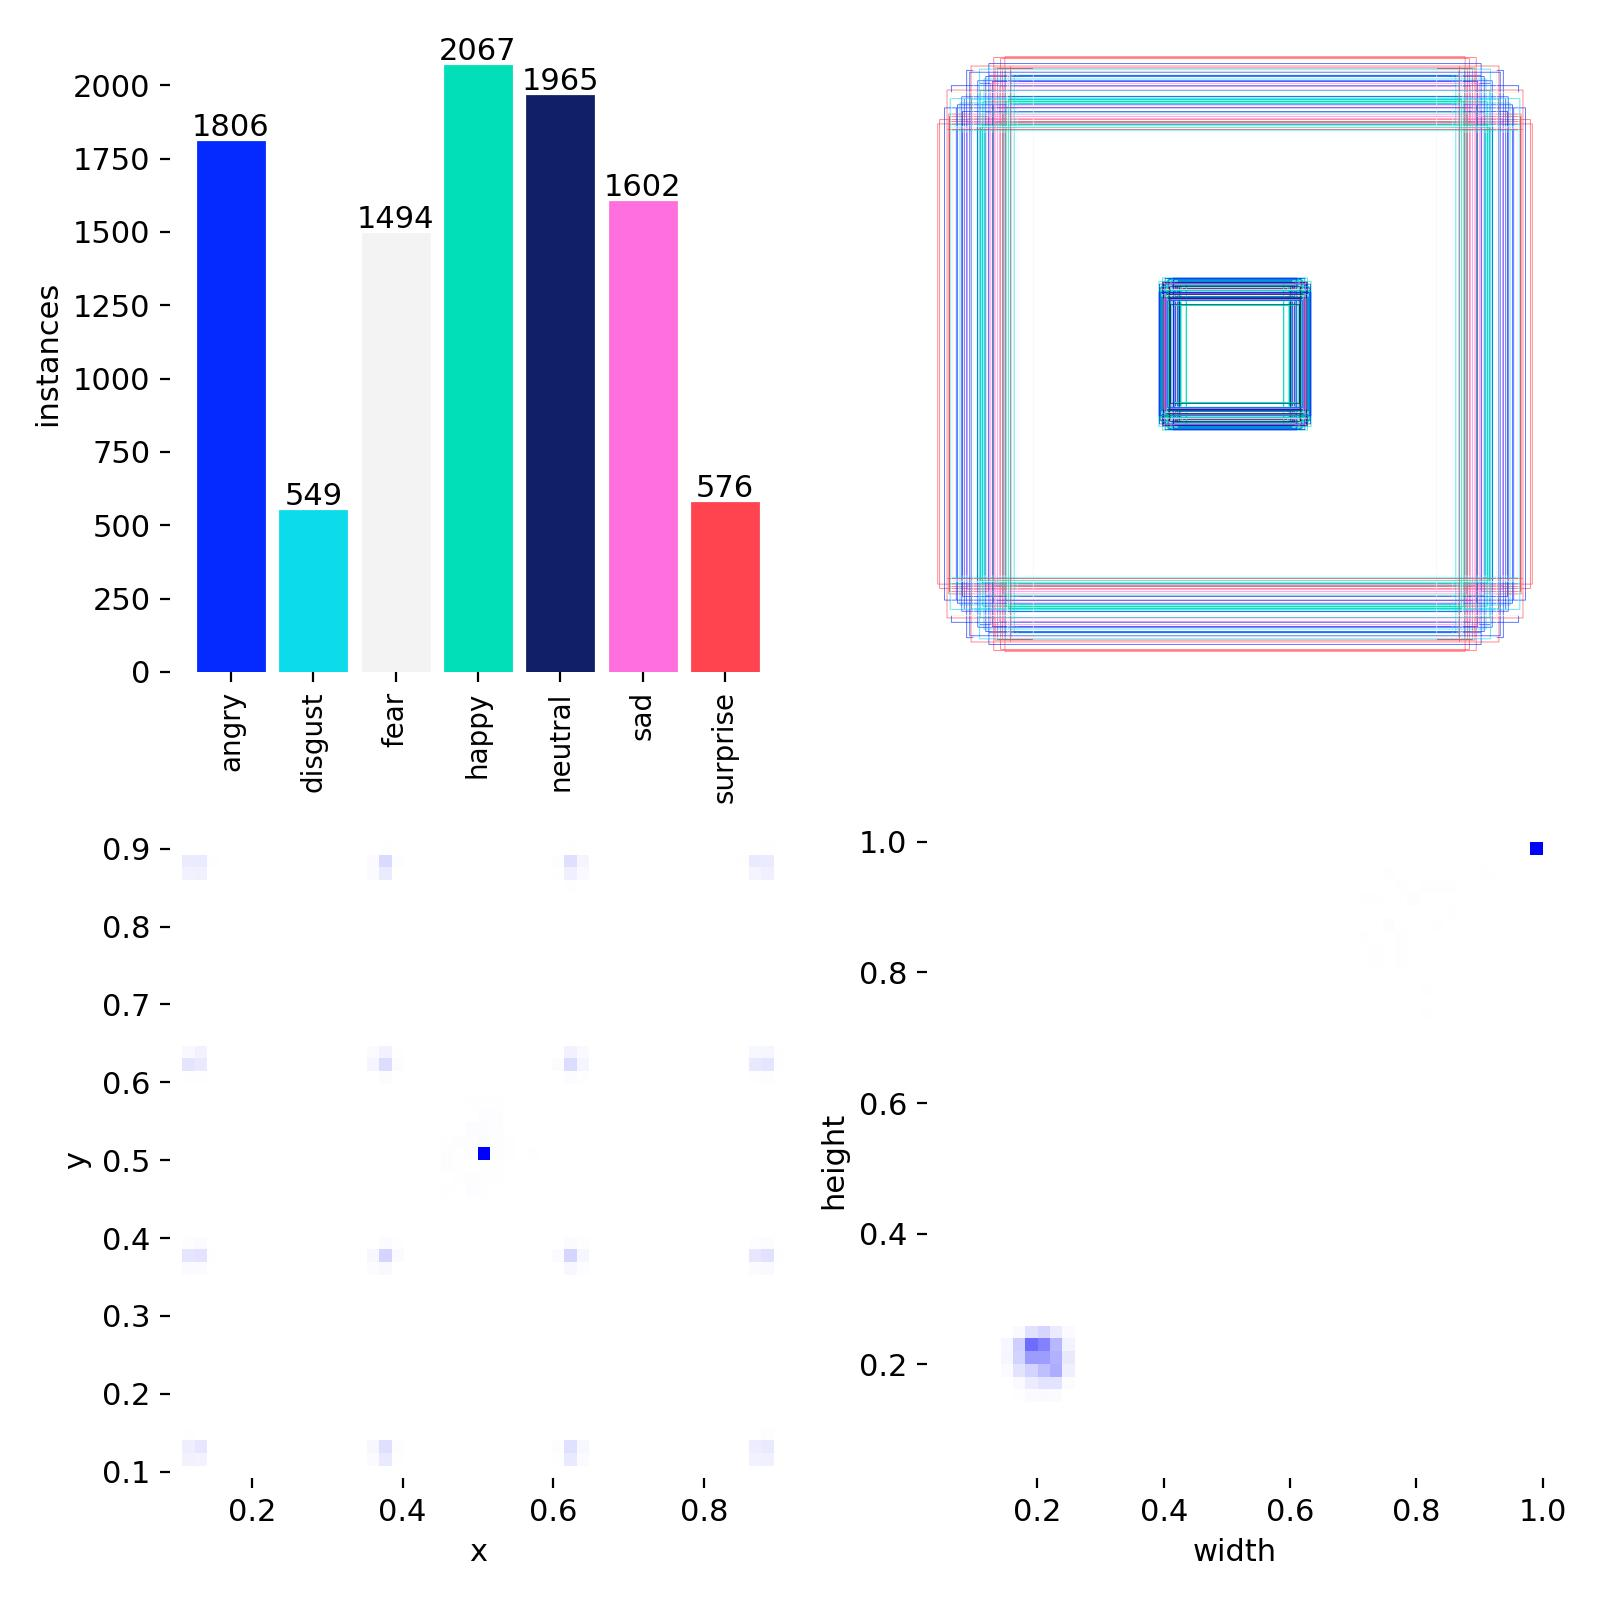

In [10]:
Image(filename='runs/detect/train/labels.jpg', width=600)

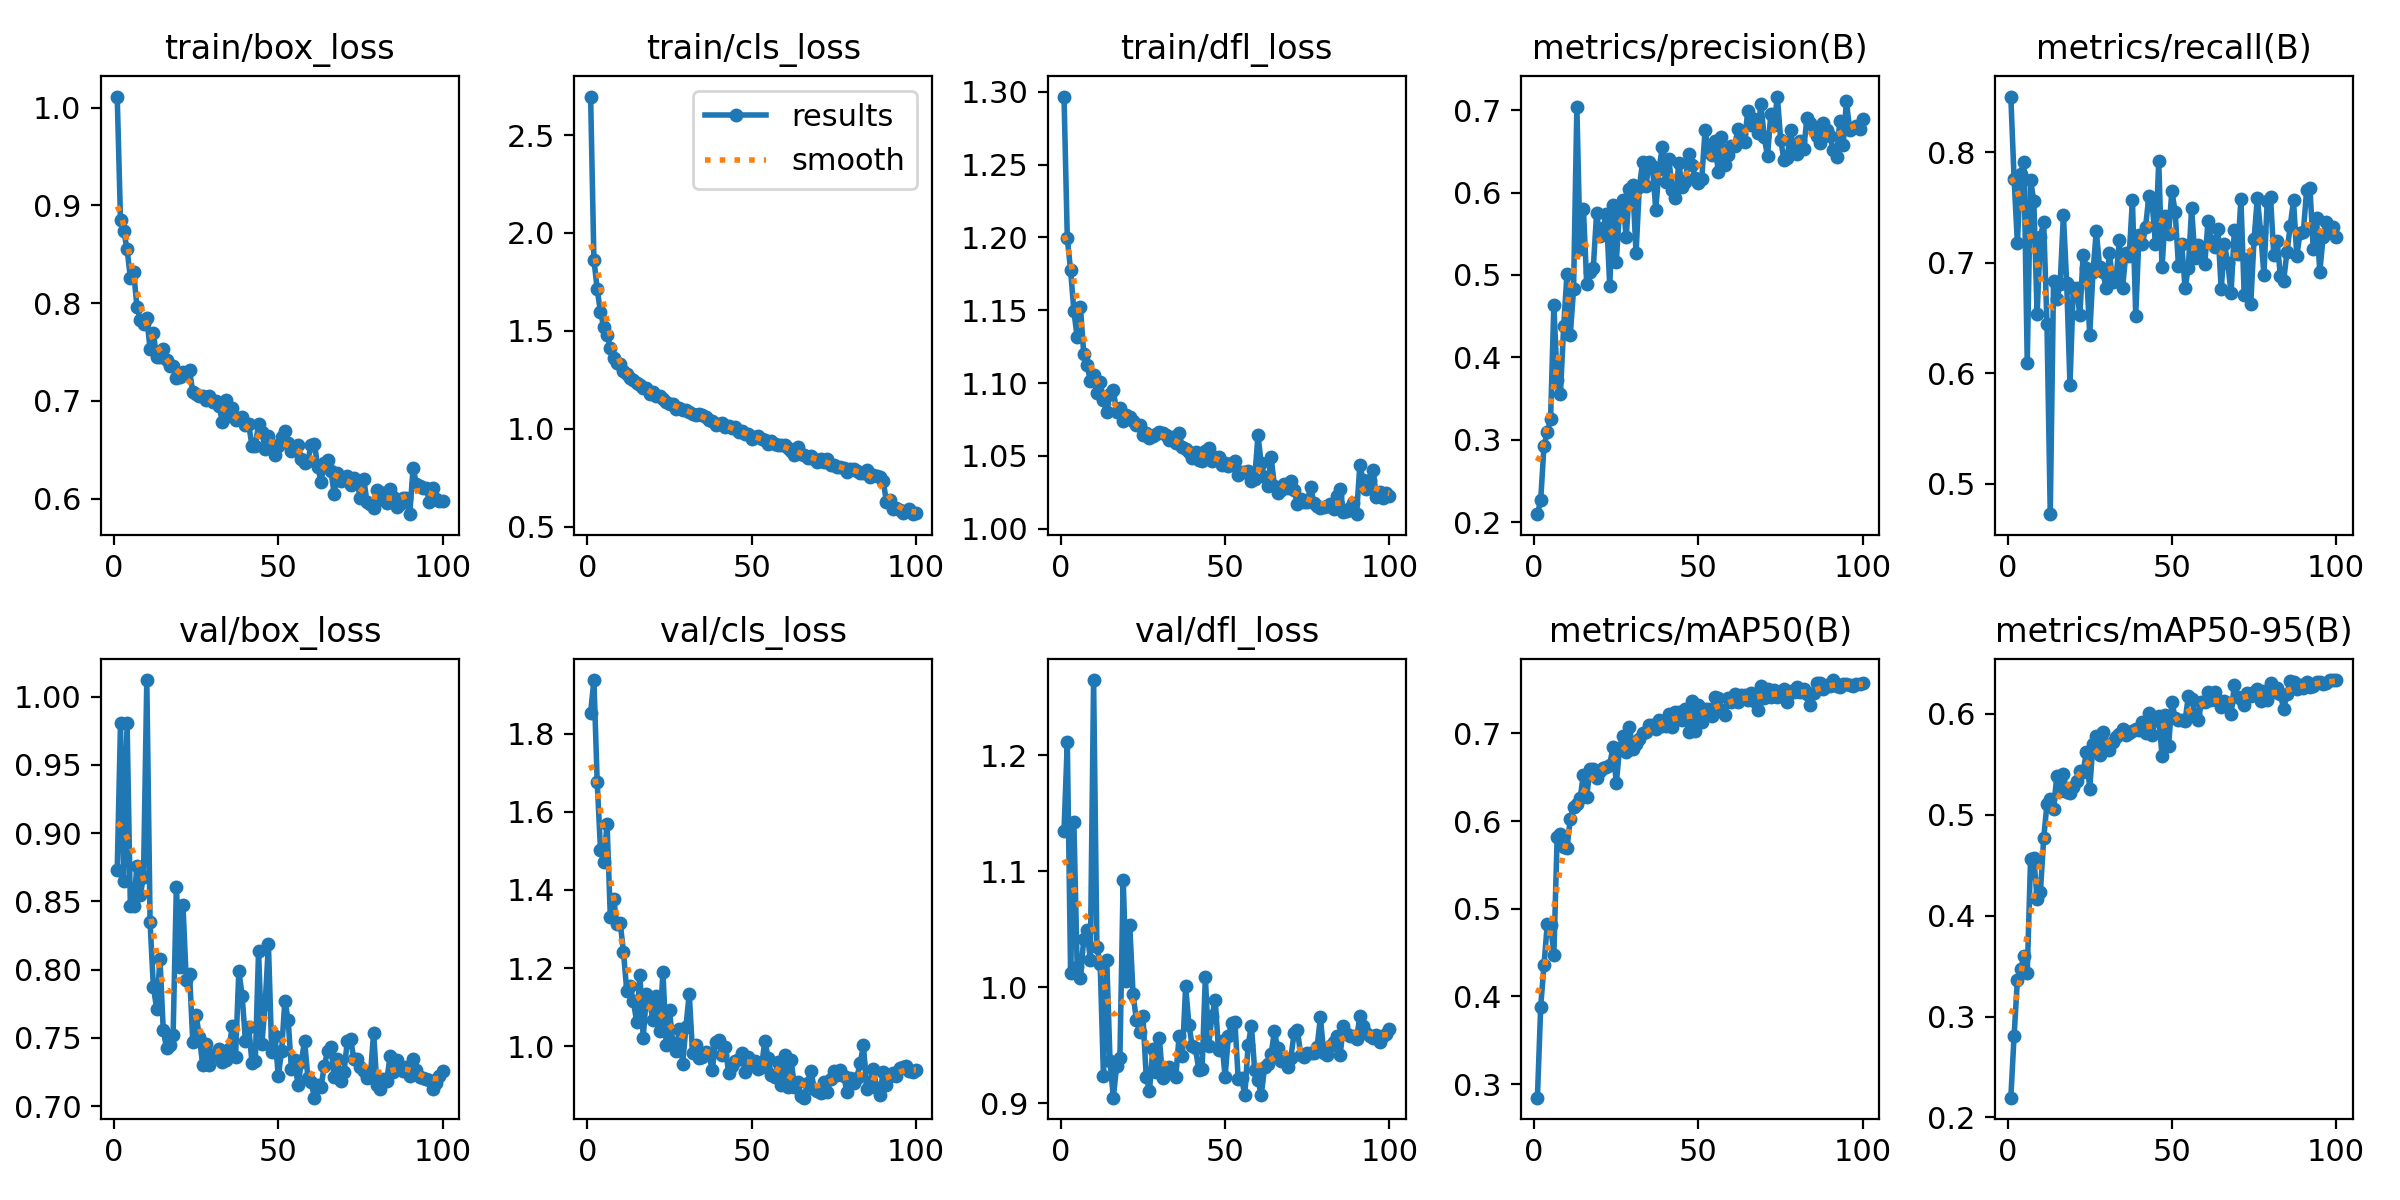

In [11]:
Image(filename='runs/detect/train/results.png', width=600)

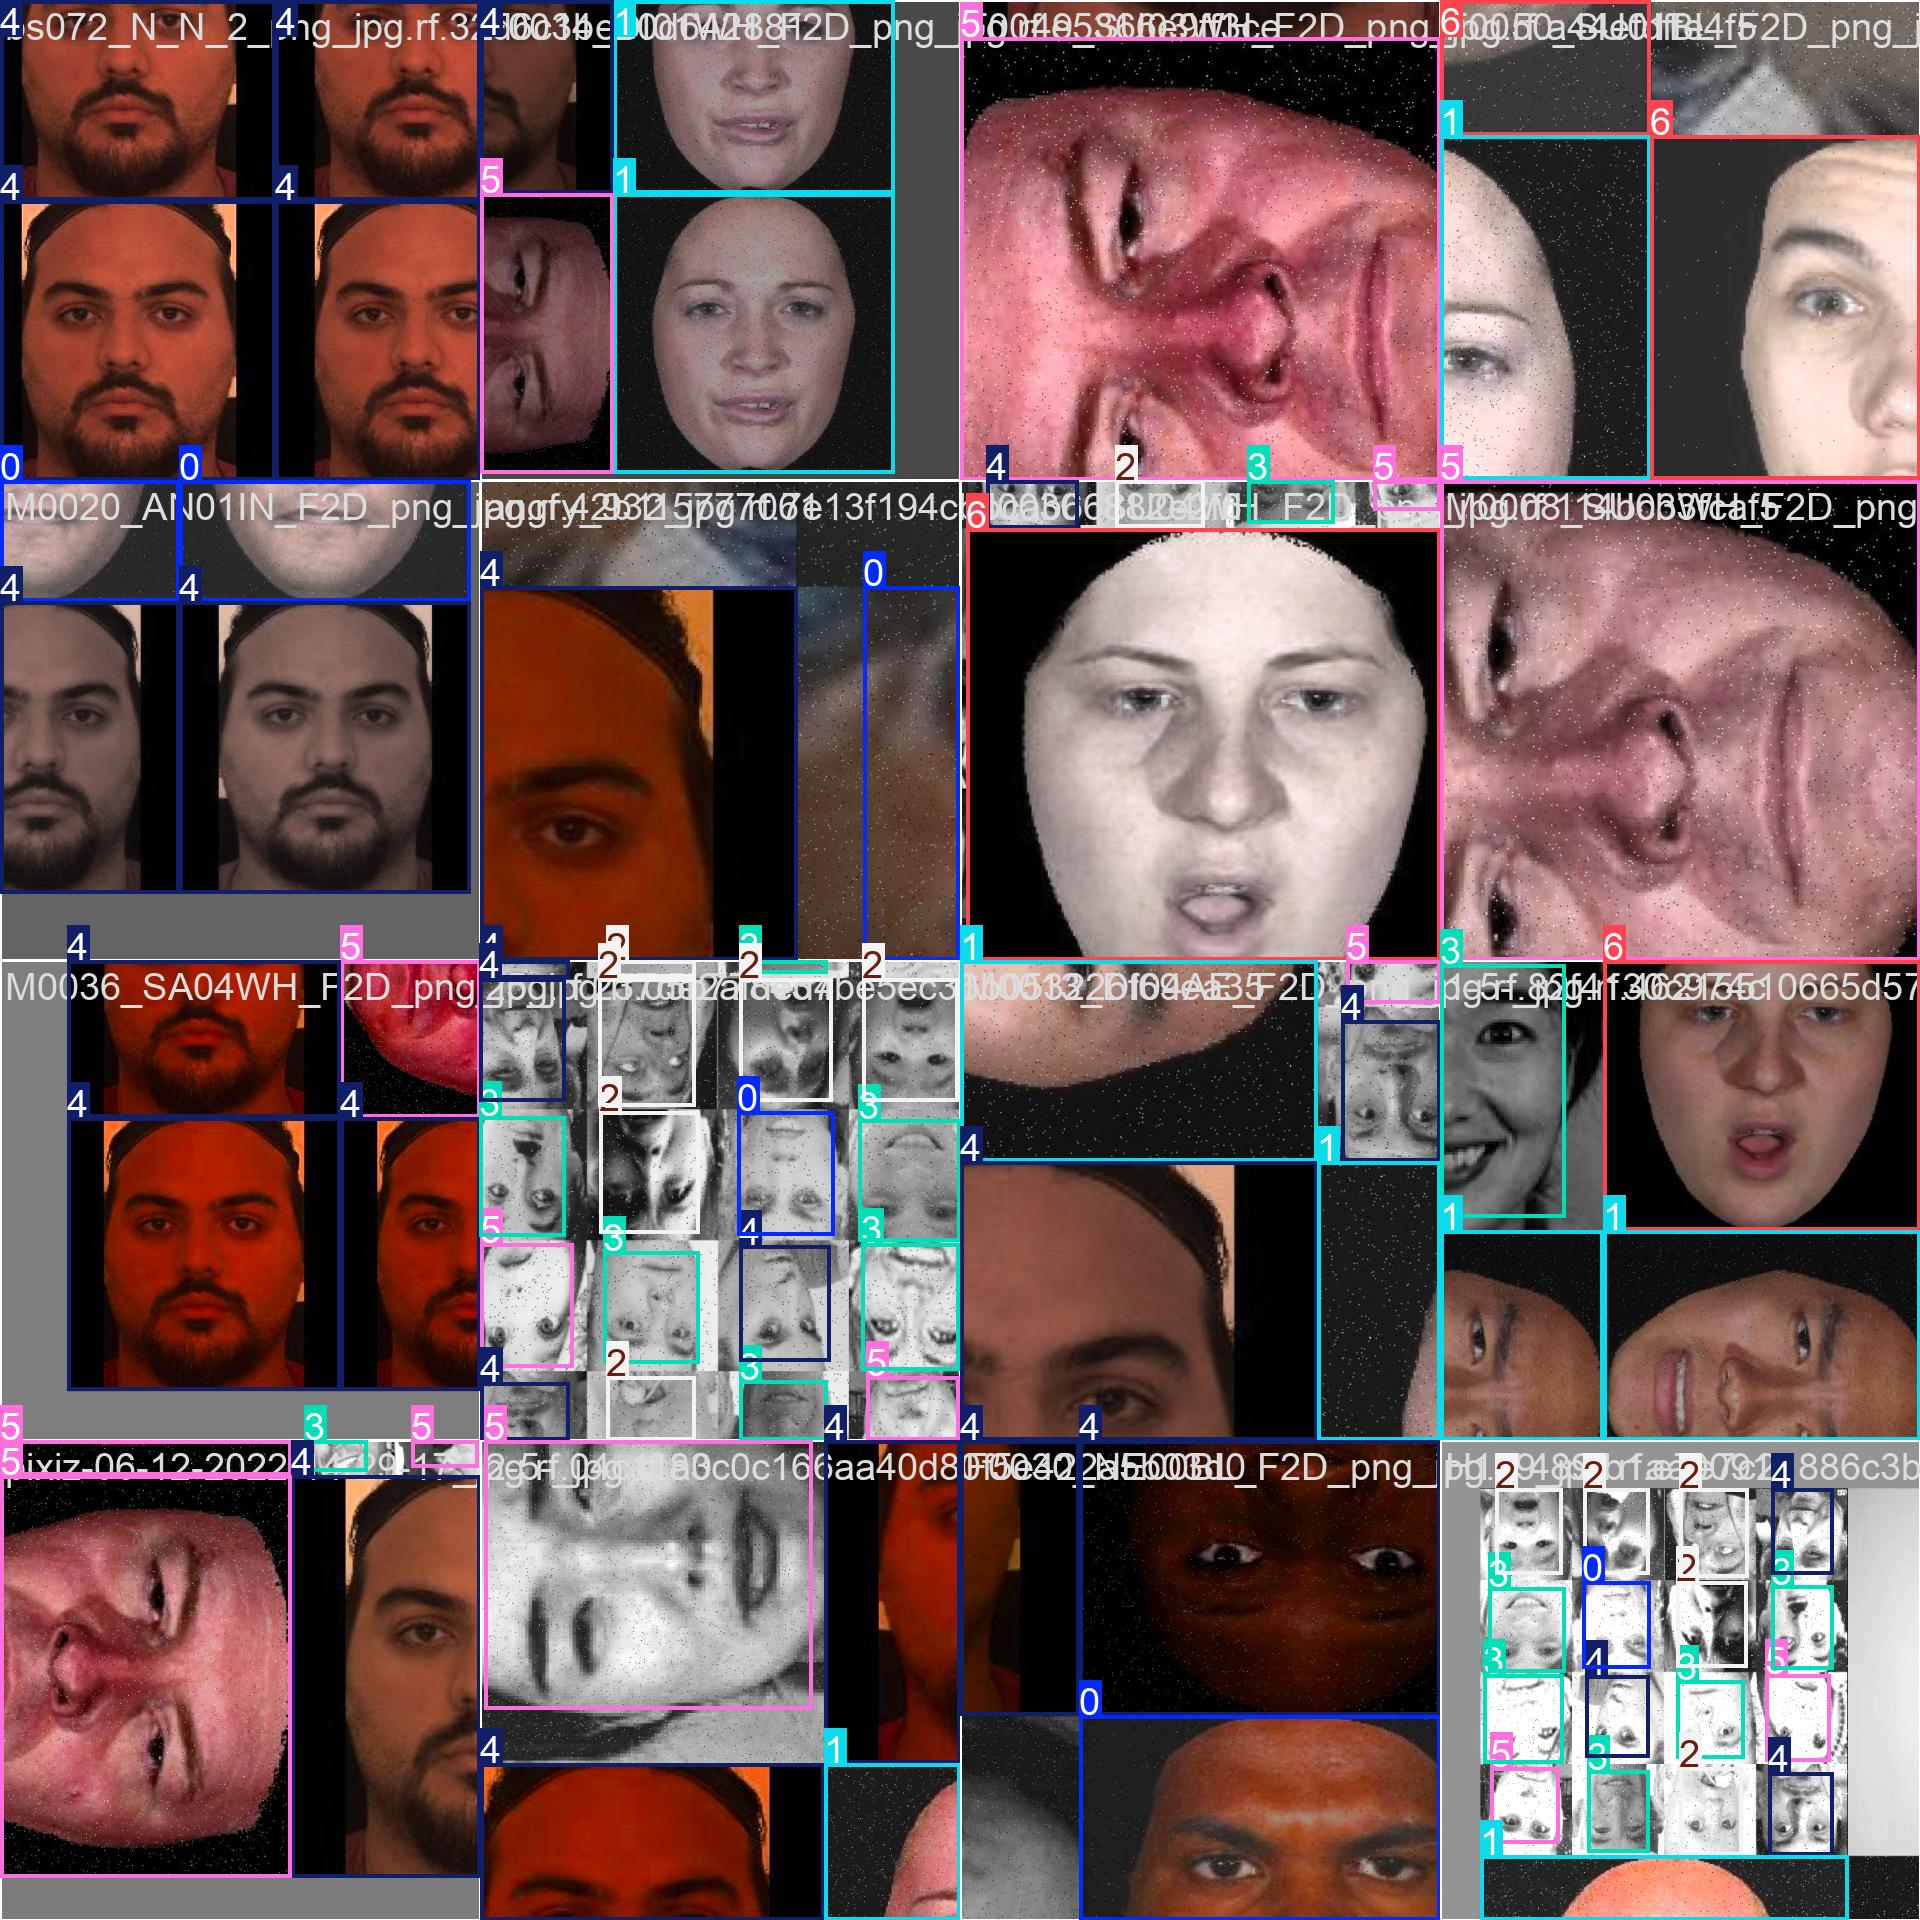

In [12]:
Image(filename='runs/detect/train/train_batch0.jpg', width=600)

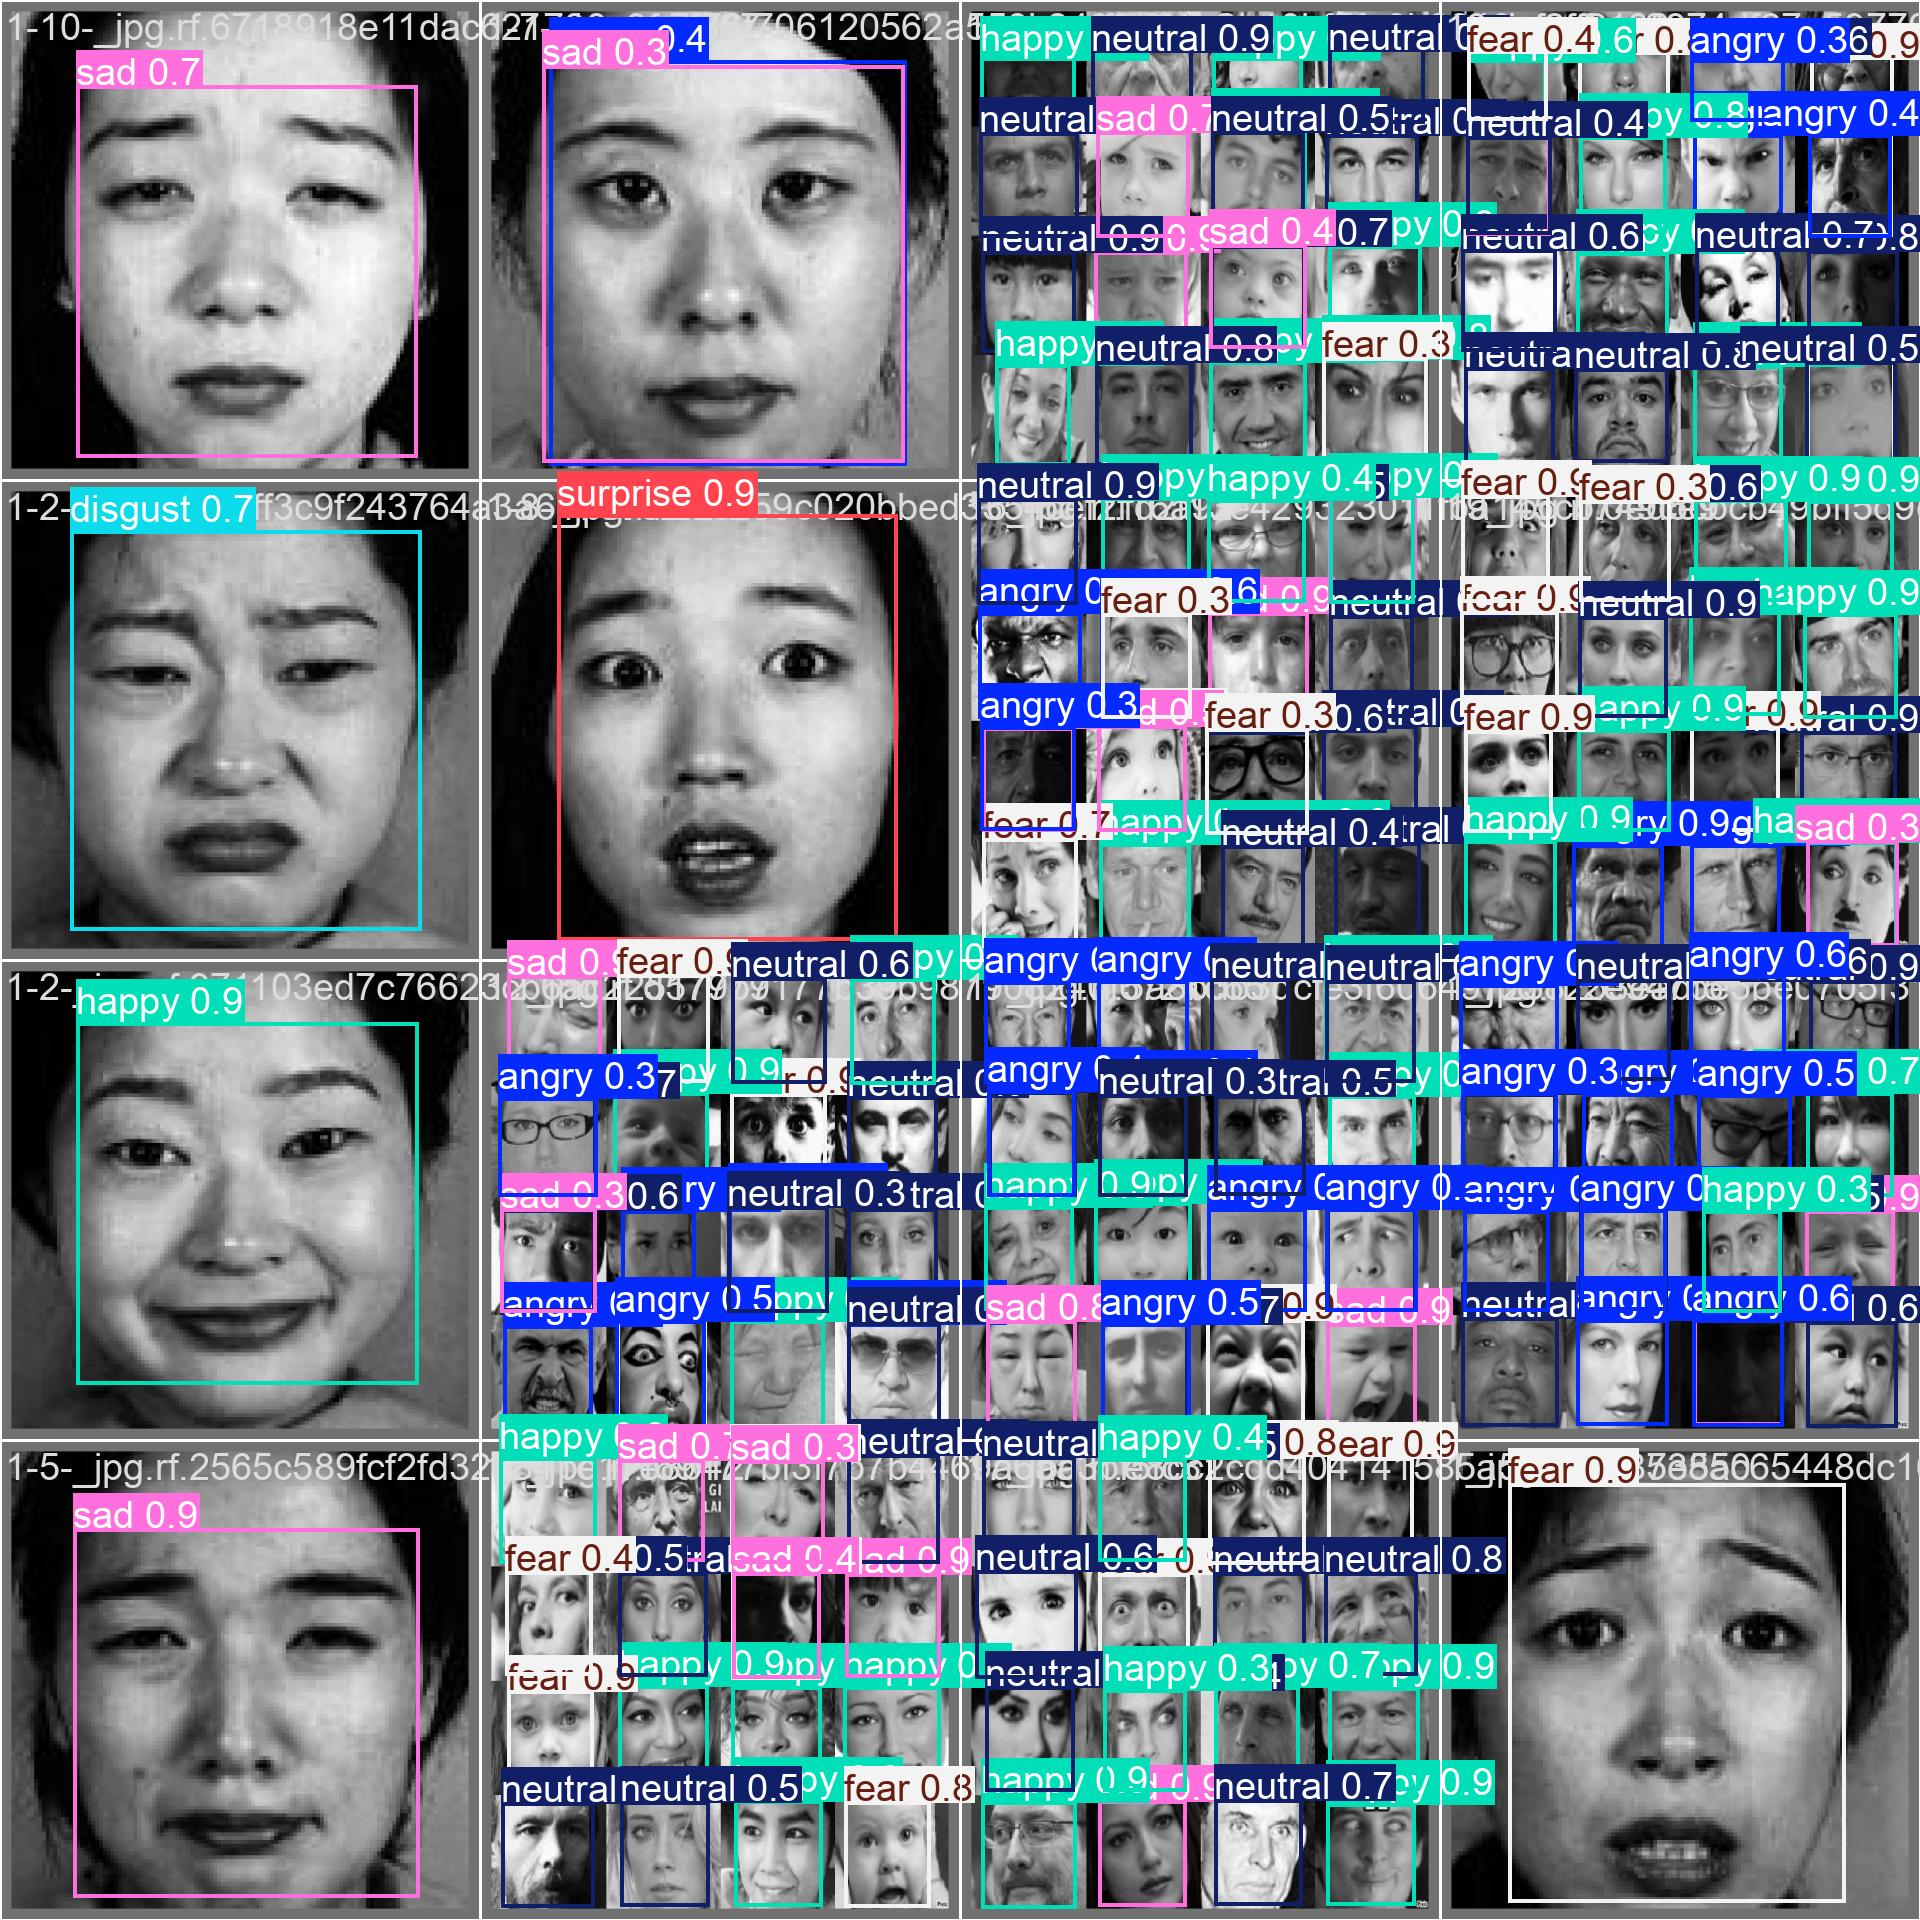

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1150.0±384.0 MB/s, size: 41.4 KB)
val: Scanning /content/Facial-Emotion-1/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 183/183 2108674.8it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 3.2it/s 3.8s
                   all        183        860       0.69      0.723      0.758      0.635
                 angry         76        176      0.536      0.545      0.596      0.439
               disgust         18         18      0.757      0.944      0.898      0.877
                  fear         51        128      0.635      0.666      0.692      0.538
                 happy         64        180      0.796      0.822      0.859      0.631
               neutral         52

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/97 /content/Facial-Emotion-1/test/images/1-5-_jpg.rf.3d8e67653415bffab33ca51618d6517f.jpg: 640x640 1 disgust, 47.9ms
image 2/97 /content/Facial-Emotion-1/test/images/1-7-_jpg.rf.0cf0bded148184a94840b1ccb24d7fc1.jpg: 640x640 1 fear, 8.3ms
image 3/97 /content/Facial-Emotion-1/test/images/1-8-_jpg.rf.df21318e9911bbbd10a7cd9f54717f7e.jpg: 640x640 1 sad, 7.9ms
image 4/97 /content/Facial-Emotion-1/test/images/10_jpg.rf.36dca183912de73f9c18e307ed3f0c37.jpg: 640x640 5 angrys, 3 fears, 4 happys, 2 neutrals, 3 sads, 7.9ms
image 5/97 /content/Facial-Emotion-1/test/images/14_jpg.rf.aa50dbe9b0350dee6101c2f2cede544c.jpg: 640x640 2 angrys, 8 fears, 1 happy, 4 neutrals, 2 sads, 7.9ms
image 6/97 /content/Facial-Emotion-1/test/images/2-3-_jpg.rf.37cbb75cc26c610bab7a39bedaf31161.jpg: 640x640 1 angry, 7.9ms
image 7/97 /content/Facial

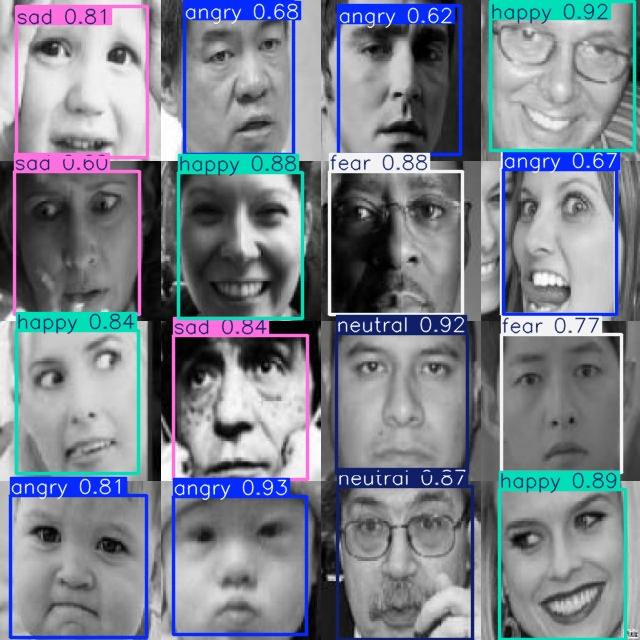

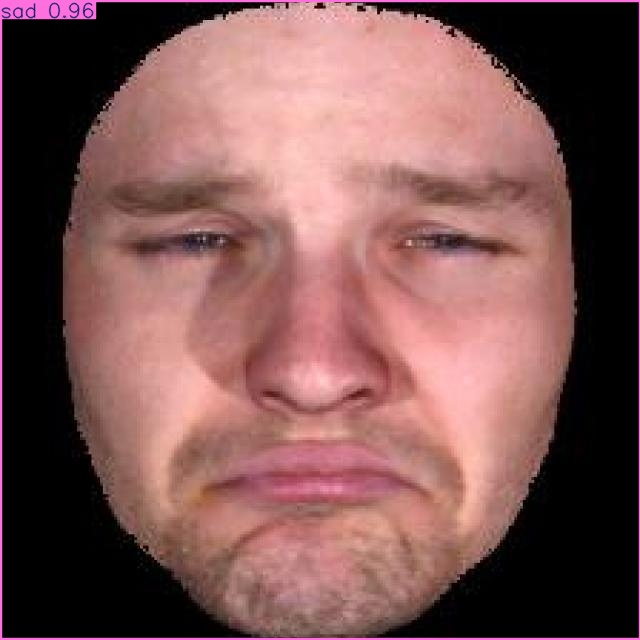

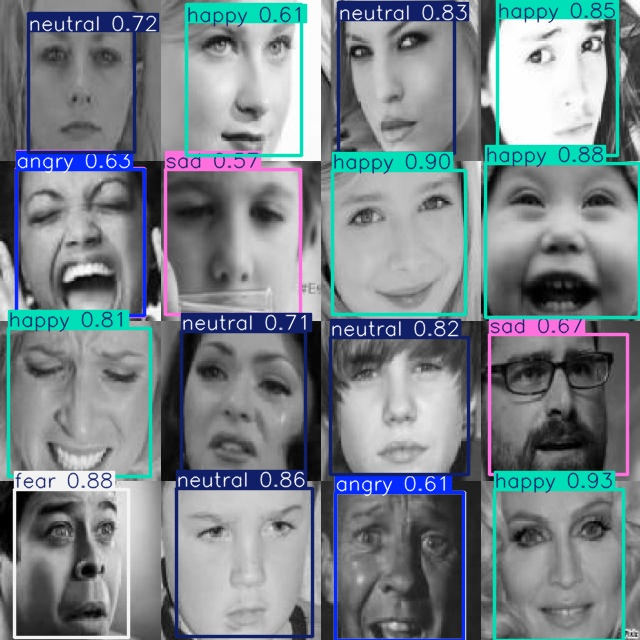

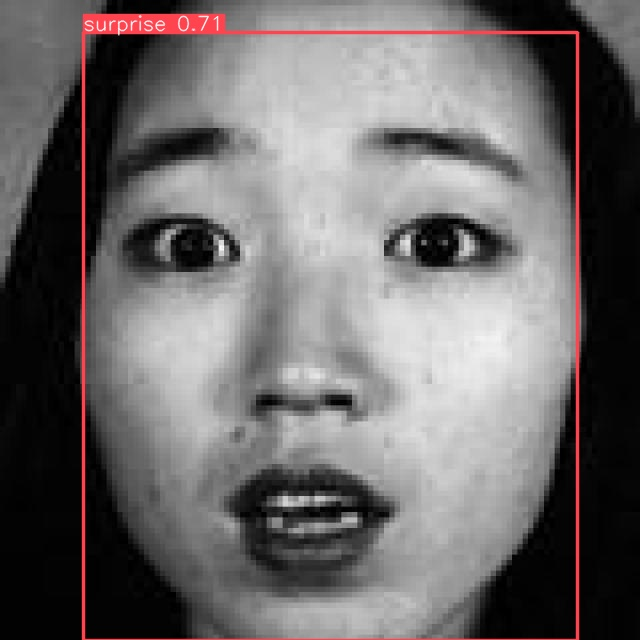

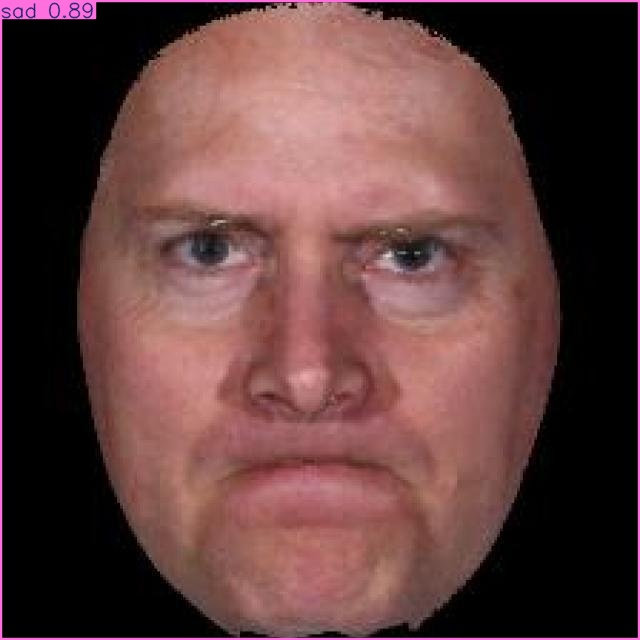

In [16]:
import glob
import os
from IPython.display import Image, display

folder = max(glob.glob("/content/runs/detect/predict*/"), key=os.path.getctime)
for image_path in glob.glob(f"{folder}/*.jpg")[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
ultralytics.__version__

'8.3.189'